## Assignment 5 Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Read the dataset to python environment 

In [2]:
#Reading the dataset

iris = pd.read_excel("iris.xls")

In [3]:
iris.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking NULL values in the dataset

iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#### 2. Do the necessary pre-processing steps

In [8]:
#Dealing with NULL values in SL column

iris_SL_mean = iris["SL"].mean()
iris["SL"].fillna(iris_SL_mean, inplace = True)

In [9]:
#Dealing with NULL values in SW column

iris_SW_mean = iris["SW"].mean()
iris["SW"].fillna(iris_SW_mean, inplace = True)

In [10]:
#Dealing with NULL values in PL column

iris_PL_mean = iris["PL"].mean()
iris["PL"].fillna(iris_PL_mean, inplace = True)

In [11]:
# checking null values

iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [13]:
#Rounding up values in SL column

iris["SL"] = np.round(iris["SL"], decimals=1)

In [14]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


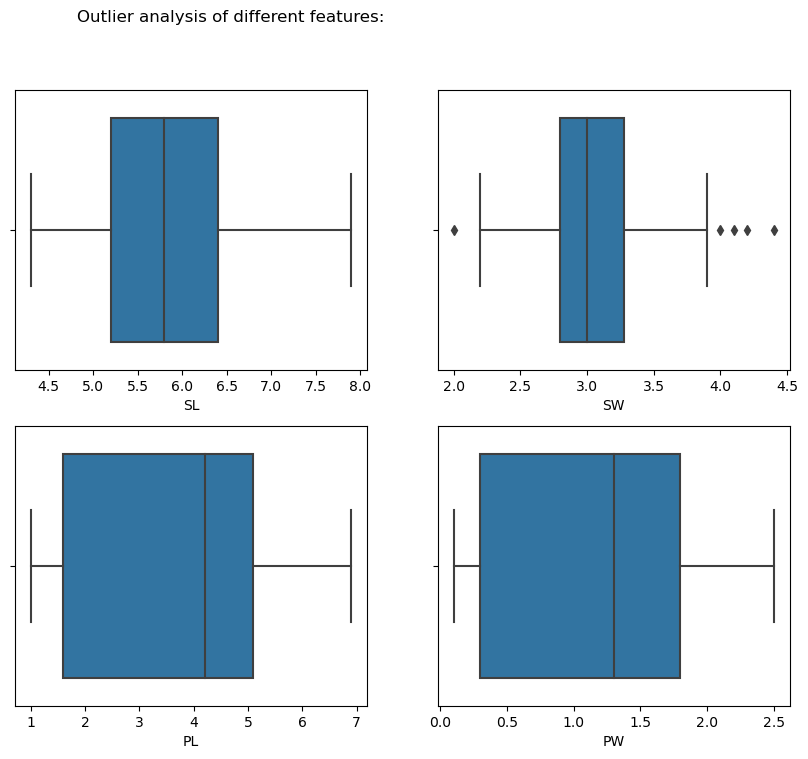

In [15]:
#Outlier Analysis

plt.figure(figsize=(10,8))
plt.suptitle("Outlier analysis of different features: ", ha = "right")
plt.subplot(2,2,1)
sns.boxplot(x = iris["SL"])

plt.subplot(2,2,2)
sns.boxplot(x = iris["SW"])

plt.subplot(2,2,3)
sns.boxplot(x = iris["PL"])

plt.subplot(2,2,4)
sns.boxplot(x = iris["PW"])

plt.show()

In [16]:
# Classification of species

iris["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

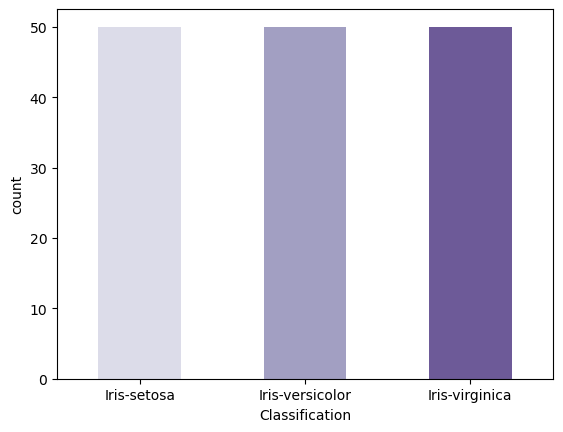

In [17]:
sns.countplot(x = iris["Classification"], palette="Purples", width = 0.5)

plt.show()

* Preprocessing

In [18]:
#Feature and target varible

x = iris.drop(columns="Classification")
y = iris["Classification"]

In [19]:
#Encoding target variable using LabelEncoder

from sklearn.preprocessing import LabelEncoder

encoder_le = LabelEncoder()

y = encoder_le.fit_transform(y)

In [20]:
iris["label"] = y

In [21]:
#scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [22]:
#spliting dataset into train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


#### 3. Find out which classification model gives the best result 

### KNN classification model

In [23]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
#prediction
knn_pred = knn.predict(x_test)

In [46]:
#Evaluation

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

print("Accuracy score: ", accuracy_score(knn_pred, y_test))


Accuracy score:  0.9666666666666667


Iris-setosa - > 0
Iris-versicolor - > 1
Iris-virginica - > 2

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



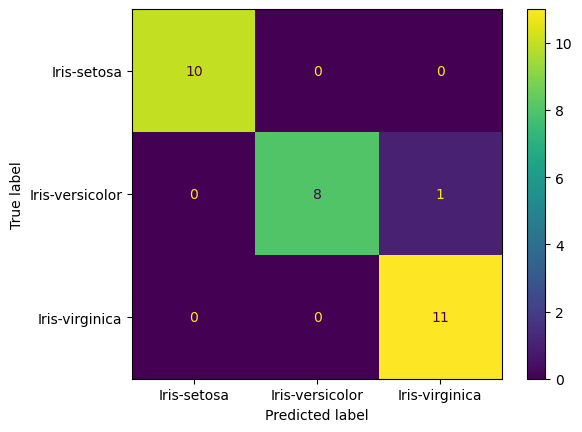

In [47]:
#Displays representation of species with respect to is labelencoded value
for Species, values in zip(iris.groupby("Classification").groups, iris.groupby("label").groups):
    print(f"{Species} - > {values}")



print("\nClassification report: \n", classification_report(y_test, knn_pred))

confm = confusion_matrix(y_test, knn_pred)

cfmd = ConfusionMatrixDisplay(confm, display_labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cfmd.plot()

### SVM Classification model

In [26]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_model.fit(x_train,y_train)

SVC(random_state=42)

In [27]:
#prediction

svm_pred = svm_model.predict(x_test)

In [28]:
#Evaluation

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print("Accuracy of SVM model: ", accuracy_score(svm_pred,y_test))

Accuracy of SVM model:  0.9666666666666667


Iris-setosa - > 0
Iris-versicolor - > 1
Iris-virginica - > 2

Classification report of SVM classifier : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



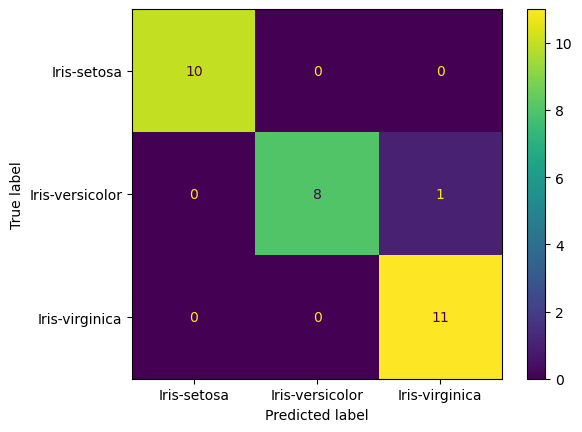

In [29]:
for Species, values in zip(iris.groupby("Classification").groups, iris.groupby("label").groups):
    print(f"{Species} - > {values}")


confm = confusion_matrix(y_test, svm_pred)

cfmd = ConfusionMatrixDisplay(confm, display_labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cfmd.plot()

print("\nClassification report of SVM classifier : \n", classification_report(y_test, svm_pred))

### Decision Tree Classification model

In [30]:
from sklearn.tree import DecisionTreeClassifier

dcl_model = DecisionTreeClassifier(random_state=42)

dcl_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
dcl_pred = dcl_model.predict(x_test)

In [32]:
print("Accuracy for Decision tree model: ", accuracy_score(y_test, dcl_pred))

Accuracy for Decision tree model:  1.0


Iris-setosa - > 0
Iris-versicolor - > 1
Iris-virginica - > 2

Classification report for Decision tree model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



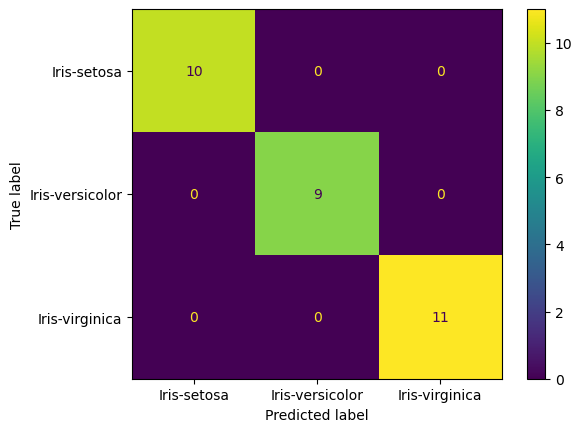

In [33]:
for Species, values in zip(iris.groupby("Classification").groups, iris.groupby("label").groups):
    print(f"{Species} - > {values}")


confm = confusion_matrix(y_test, dcl_pred)
cfmd = ConfusionMatrixDisplay(confm, display_labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cfmd.plot()


print("\nClassification report for Decision tree model:\n ", classification_report(dcl_pred, y_test))

### Random forest Classification model

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42)

rfc_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
#prediction
rfc_pred = rfc_model.predict(x_test)

In [36]:
#Evaluation

print("Accuracy score for Random forest: ", accuracy_score(rfc_pred, y_test))

Accuracy score for Random forest:  1.0


Iris-setosa - > 0
Iris-versicolor - > 1
Iris-virginica - > 2

Classification report for random forest model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



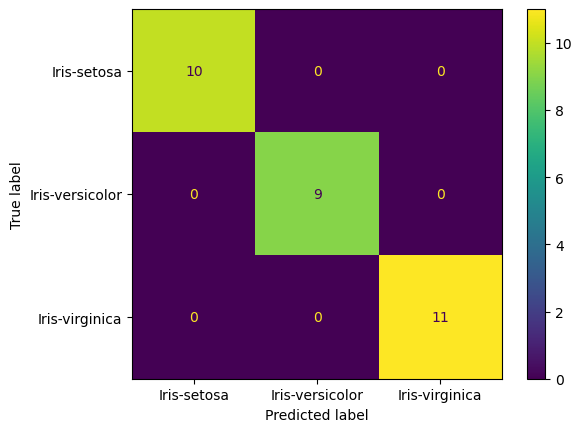

In [37]:
for Species, values in zip(iris.groupby("Classification").groups, iris.groupby("label").groups):
    print(f"{Species} - > {values}")


confm = confusion_matrix(rfc_pred, y_test)
cfmd = ConfusionMatrixDisplay(confm, display_labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cfmd.plot()


print("\nClassification report for random forest model:\n ", classification_report(rfc_pred, y_test))

In [38]:
acc_knn = accuracy_score(knn_pred, y_test)
acc_svm = accuracy_score(svm_pred,y_test)
acc_dt = accuracy_score(y_test, dcl_pred)
acc_rf = accuracy_score(rfc_pred, y_test)

In [48]:
print("\nAccuracy score for KNN model: ", accuracy_score(knn_pred, y_test))
print("\nAccuracy score of SVM model: ", accuracy_score(svm_pred,y_test))
print("\nAccuracy score for Decision tree model: ", accuracy_score(y_test, dcl_pred))
print("\nAccuracy score for Random forest model: ", accuracy_score(rfc_pred, y_test))


Accuracy score for KNN model:  0.9666666666666667

Accuracy score of SVM model:  0.9666666666666667

Accuracy score for Decision tree model:  1.0

Accuracy score for Random forest model:  1.0


* The different models like KNN, SVM, Decision tree and Random forest resulted in an accuracy score of 0.96, 0.96, 1.0, 1.0 respectively.
* The higher accuracy score of the tree models may due to the overfitting of the model.


#### Cross validation 


In [90]:
#Initializing KFold cross validation

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, random_state=42, shuffle=True)


In [98]:
#cross validation on KNN model

score_knn = cross_val_score(knn, x,y, cv = kfold)
print("Scores", score_knn)
print("\nMean score of KNN model:", score_knn.mean())

Scores [0.96666667 0.96666667 1.         0.93333333 1.        ]

Mean score of KNN model: 0.9733333333333334


In [97]:
#cross validation on svm model

score_svm = cross_val_score(svm_model,x,y, cv = kfold)
print("Scores", score_svm)
print("\nMean score of SVM model:", score_svm.mean())

Scores [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]

Mean score of SVM model: 0.9666666666666666


In [96]:
#cross validation on decision tree model

score_dt = cross_val_score(dcl_model,x,y, cv=kfold)
print("Scores", score_dt)
print("\nMean score of decision tree model:", score_dt.mean())

Scores [1.         0.9        0.93333333 0.93333333 0.93333333]

Mean score of decision tree model: 0.9400000000000001


In [95]:
#cross validation on random forest model

score_rf = cross_val_score(rfc_model,x,y, cv=kfold)
print("Scores", score_rf)
print("\nMean score of random forest model:", score_rf.mean())

Scores [1.         0.9        0.93333333 0.93333333 0.96666667]

Mean score of random forest model: 0.9466666666666667


* The cross validation technique has been used to reduce the overfitting of the models and also to obtain a generalised performance of different classification models.

* After cross validation the different scores of classification models are :
            
            > KNN : 0.97
            > SVM :0.96
            > Decision tree : 0.94
            > Random forest : 0.94
            
 * So the KNN model resulted a higher accuracy score than the other classification models on the Iris dataset.